# IMPORTING IMPORTANT LIBRARIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# INITIALIZING AND STUDING DATA


In [ ]:
bank=pd.read_csv('bankruptcy-prevention.csv')

In [ ]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
# to study the basic data types and density of values in each column
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
# description of the data to get column wise measure of central tendency and ratio percentiles
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#to check wether data contains any null value
bank.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [ ]:
# bank.duplicated().sum()
# print(bank.loc[bank.duplicated()].head())
# bank=bank.drop_duplicates(keep="first")
# bank=bank.reset_index()

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# converting the object data type column to numeric 0 and 1 values for ease of calculation of the end result
label = LabelEncoder()
bank[' class'] = label.fit_transform(bank[' class'])
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# Data Visualizations

<Axes: xlabel=' class', ylabel='count'>

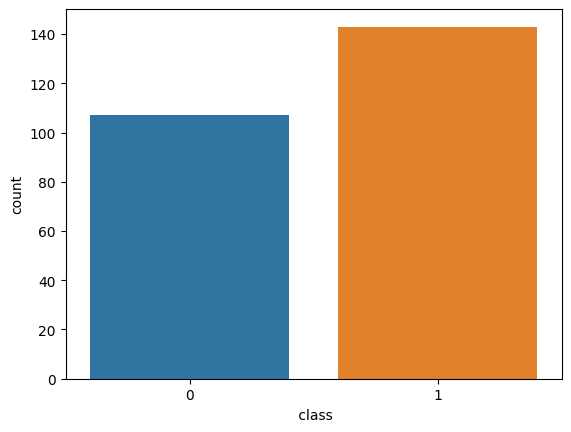

In [ ]:
#countplot for class column showing the count of final values present in whole dataset
sns.countplot(x=' class',data=bank)

<ipython-input-10-1d7d99aa27a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank)


<Axes: ylabel='Density'>

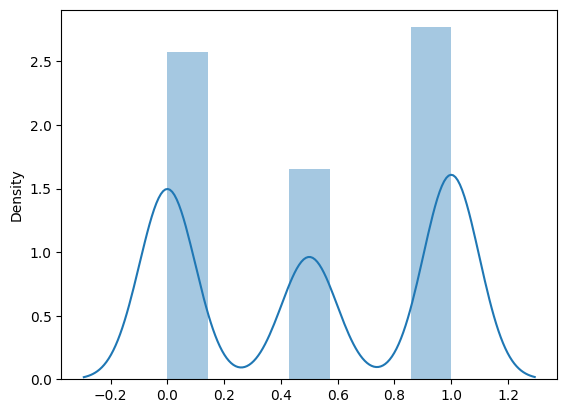

In [ ]:
#plot to represent density of data distributed
sns.distplot(bank)

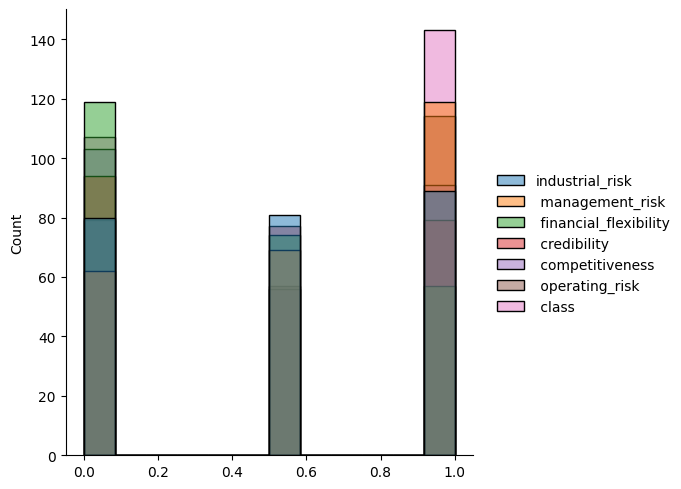

In [ ]:
sns.displot(bank)

In [ ]:
#correlation between the various data columns
bank.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


# Visualization Of Columns With Respect To The Class Column

In [ ]:
pd.crosstab(bank[' class'],bank['industrial_risk'])

industrial_risk,0.0,0.5,1.0
class,,,
0,26,28,53
1,54,53,36


<Axes: xlabel=' class'>

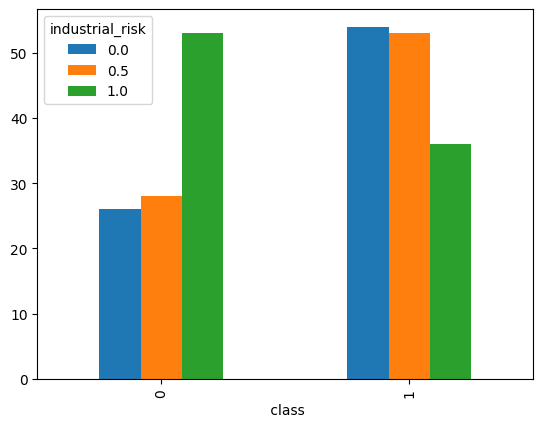

In [ ]:
pd.crosstab(bank[' class'],bank['industrial_risk']).plot(kind='bar')


<Axes: xlabel=' class'>

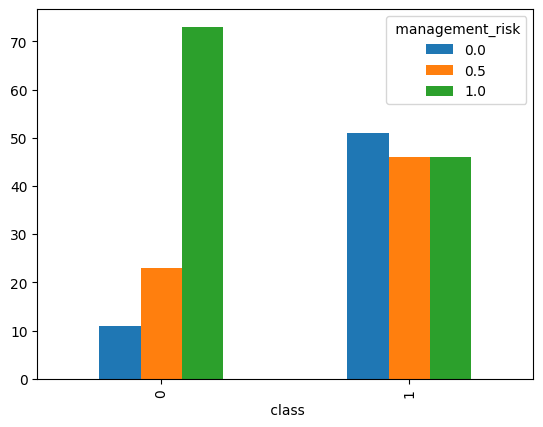

In [ ]:
pd.crosstab(bank[' class'],bank[' management_risk']).plot(kind='bar')

<Axes: xlabel=' class'>

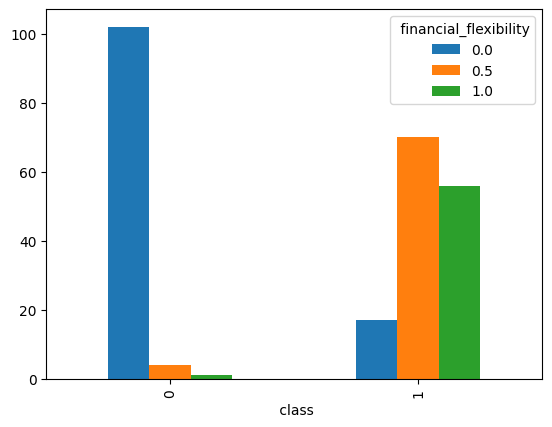

In [ ]:
pd.crosstab(bank[' class'],bank[' financial_flexibility']).plot(kind='bar')

<Axes: xlabel=' class'>

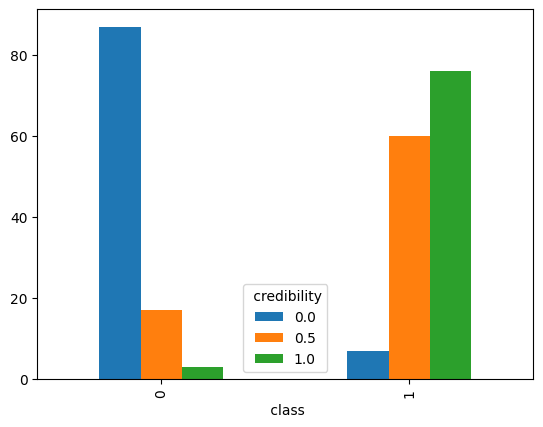

In [ ]:
pd.crosstab(bank[' class'],bank[' credibility']).plot(kind='bar')

<Axes: xlabel=' class'>

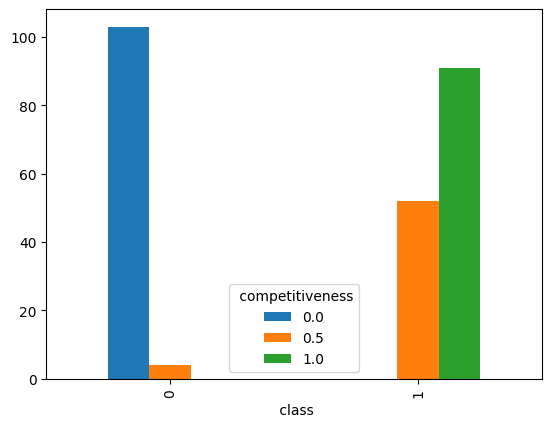

In [ ]:
pd.crosstab(bank[' class'],bank[' competitiveness']).plot(kind='bar')

<Axes: xlabel=' class'>

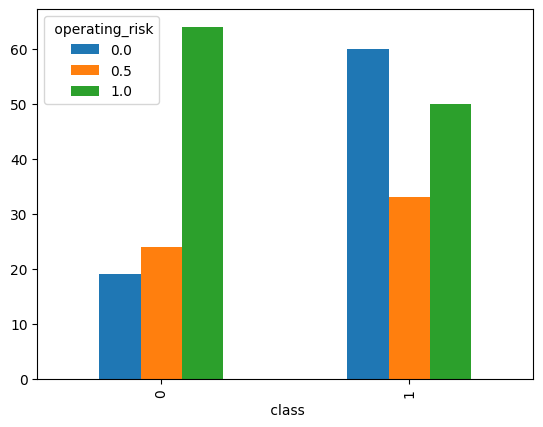

In [ ]:
pd.crosstab(bank[' class'],bank[' operating_risk']).plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x7d9d953b5d20>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9d953b6140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9d953b5a80>,
 'medians': [<matplotlib.lines.Line2D at 0x7d9d953b6680>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d9d953b6920>,
 'means': []}

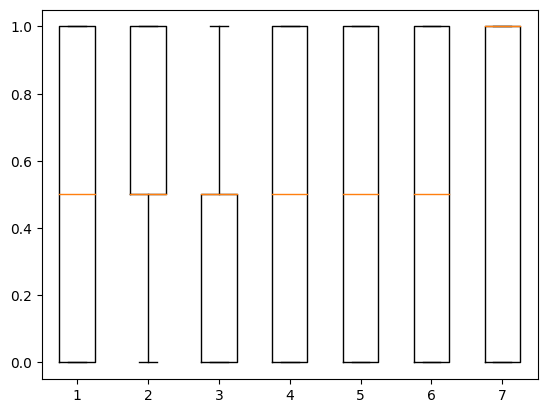

In [ ]:
# boxplots are used to identify outliers(if any)
plt.boxplot(bank)

<Axes: >

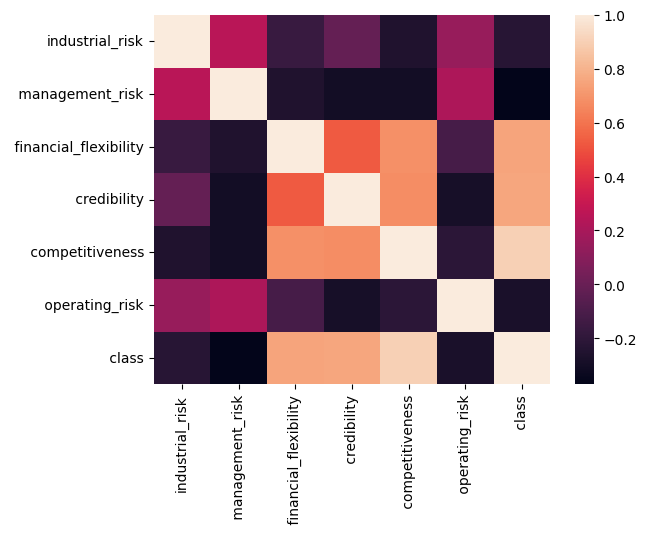

In [ ]:
sns.heatmap(bank.corr())    #heatmap of bank.corr

In [ ]:
bank.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

# Splitting The Train-Test Data

In [ ]:
x=bank.iloc[:,0:6]
y=bank.iloc[:,6]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# **Building The Model**
# 1)logistic regression model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)
y_pred=classifier.predict(xtest)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
y_pred_df=pd.DataFrame({'actual':ytest,'predicted_y':y_pred})
y_pred_df

,actual,predicted_y
142,1,1
6,0,0
97,0,0
60,0,0
112,1,1
181,1,1
197,1,1
184,1,1
9,0,0
104,0,0


In [ ]:
#confusion matrix for normal accuracy

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,y_pred)
print(confusion_matrix)

[[21  0]
 [ 0 29]]


`the confusion matrix shows that the model prediction are 100% correct and all the values are truly predicted.`


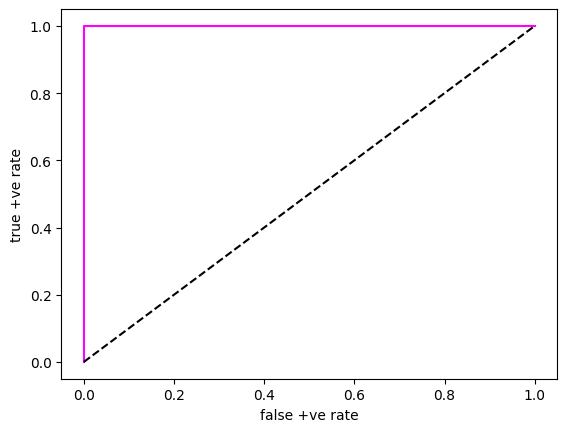

In [ ]:
# roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(ytest,y_pred)

auc=roc_auc_score(ytest,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='magenta')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false +ve rate')
plt.ylabel('true +ve rate')
plt.show()                                       #######over fitted

In [ ]:
auc

1.0

`this roc curve represents that though the values prediction is completely  correct, the model is overfitted hence accuracy is such a clear figure and thus the model can be evaluated on the basis of regulazing the values as follows`

`here we will use two types of regularization techniques
1.Ridge Regression:
Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
2.Lasso Regression:
Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients`

`Logistic regression turns the linear regression framework into a classifier and various types of 'regularization',
of which the Ridge and Lasso methods are most common, help avoid overfit in feature rich instances.`

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Ridge Regression:
# Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients

# Lasso Regression:
# Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients

In [ ]:
lasso = Lasso(alpha = 0.05)
lasso.fit(xtrain, ytrain)
y_pred1 = lasso.predict(xtest)

In [ ]:
mean_squared_error = np.mean((y_pred1 - ytest)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 0.05900029734212345


In [ ]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = xtrain.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

                  Columns  Coefficient Estimate
0         industrial_risk             -0.000000
1         management_risk             -0.000000
2   financial_flexibility              0.041414
3             credibility              0.168104
4         competitiveness              0.615406
5          operating_risk             -0.000000


`this values are represented to show the relevance of columns for model building using regression to avoid over-fitting the values > 0 are the columns that are more relevant in building the model , and the values <= 0 are discarded.`

In [ ]:
l_x=bank.iloc[:,2:5]
l_y=bank.iloc[:,6]

In [ ]:
xltrain,xltest,yltrain,yltest=train_test_split(l_x,l_y,test_size=0.2,random_state=42)

In [ ]:
classifier.fit(xltrain,yltrain)
yl_pred=classifier.predict(xltest)
yl_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
auc2=roc_auc_score(yltest,yl_pred)

In [ ]:
auc2

1.0

`this regularization do not have much effect on accuracy `

In [ ]:
ridgeR = Ridge(alpha = 2) # alpha is a hyper parameter which needs to be experimented ie we can change it accordingly.
ridgeR.fit(xtrain, ytrain)
y_pred = ridgeR.predict(xtest)

In [ ]:
mean_squared_error_ridge = np.mean((y_pred - ytest)**2)
print(mean_squared_error_ridge)

0.03348299226541776


In [ ]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= xtrain.columns
ridge_coefficient['Ridge Coeff.Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

                  Columns  Ridge Coeff.Estimate
0         industrial_risk             -0.014452
1         management_risk             -0.083330
2   financial_flexibility              0.249118
3             credibility              0.303924
4         competitiveness              0.586206
5          operating_risk             -0.050127


In [ ]:
r_x=bank.iloc[:,2:5]
r_y=bank.iloc[:,6]

In [ ]:
xrtrain,xrtest,yrtrain,yrtest=train_test_split(r_x,r_y,test_size=0.2,random_state=42)

In [ ]:
classifier.fit(xrtrain,yrtrain)
yr_pred=classifier.predict(xrtest)
yr_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
auc3=roc_auc_score(yrtest,yr_pred)
auc3

1.0

`this shows that values  regularized  are not much useful and accuracy  given is unchanged`

`It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.`

# 2) knn model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import math
math.sqrt(len(ytest))

7.0710678118654755

In [ ]:
kfold = KFold(n_splits=10) #ensures loop to perform 10 different splits
model = KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain,ytrain)
preds = model.predict(xtest) # predicting on test data set
pd.Series(preds).value_counts()
pd.crosstab(ytest,preds)

col_0,0,1
class,,
0,21,0
1,1,28


In [ ]:
np.mean(preds==ytest)
model.score(xtrain,ytrain)
print("Accuracy", accuracy_score(ytest,preds)*100)
results = cross_val_score(model, x, y, cv=kfold) #performance of model

Accuracy 98.0


In [ ]:
results

array([1.  , 1.  , 0.96, 1.  , 1.  , 0.96, 1.  , 0.92, 1.  , 0.96])

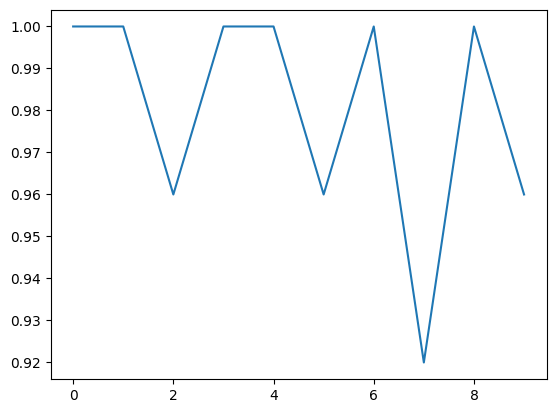

In [ ]:
plt.plot(results)

`knn algorithem is basically used while multiclass classification ie when there are more that 2 classes where the data has to be identified in. thus for this project we will reject this model.`

# 3)naive bayes classification model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB #binary

In [ ]:
GNB = GaussianNB() #continous
MNB = MultinomialNB() #discrete

In [ ]:
Naive_GNB = GNB.fit(xtrain ,ytrain)
Y_pred = Naive_GNB.predict(xtest)
Y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[21  0]
 [ 0 29]]


In [ ]:
GNB_acc = accuracy_score(ytest , Y_pred)
GNB_acc

1.0

In [ ]:
Naive_MNB = MNB.fit(xtrain ,ytrain)
Y__pred = Naive_MNB.predict(xtest)
Y__pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
cm = confusion_matrix(ytest, Y__pred)
print(cm)

[[21  0]
 [ 0 29]]


In [ ]:
MNB_acc = accuracy_score(ytest , Y__pred)
MNB_acc

1.0

In [ ]:
BNV = BernoulliNB(force_alpha=True)
BNV.fit(xtrain, ytrain)
b_pred=BNV.predict(xtest)
print(b_pred)

[1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
bcm = confusion_matrix(ytest, b_pred)
print(bcm)

[[21  0]
 [ 0 29]]


`we have performed the three types of naive bayes algorithms here they are
1)multinomial NB: used when we have discrete values in dataset
2)gaussian NB :used when we have continous values in dataset
for our data we consider multinomial NB algorithm .
the accuracy values are 100% in case of naive bayes classification, as we all know that naive bayes is used in very simpler problems of classification.
3)bernoulli NB : It assumes that all our features are binary such that they take only two values.`

`the number of data in data set is limited and thus we cannot rely on the model for large and complex data handeling and we will thus reject this model for the project.`

# 4)svm model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(kernel='rbf',gamma=0.001)
svm.fit(xtrain,ytrain)
svm_pred=svm.predict(xtest)
acc=accuracy_score(ytest,svm_pred)*100
print('accuracy',acc)
confusion_matrix(ytest,svm_pred)

accuracy 57.99999999999999


array([[ 0, 21],
       [ 0, 29]])

`the gamma parameter defines how far the influence of a single training data point on the decision boundry reaches,with low values meaning 'far' and high values meaning 'close'`

In [ ]:
svm2=SVC(kernel='rbf',gamma=0.01)  #Radial Basis Function
svm2.fit(xtrain,ytrain)
svm2_pred=svm2.predict(xtest)
acc=accuracy_score(ytest,svm2_pred)*100
print('accuracy',acc)
confusion_matrix(ytest,svm2_pred)

                                          #  tp   fp
                                          #  fn   tn

# It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

accuracy 98.0


array([[21,  0],
       [ 1, 28]])

In [ ]:
svm2_linear=SVC(kernel='linear',gamma=0.01)  # when single hyperplane divided data
svm2_linear.fit(xtrain,ytrain)
svm2_linear_pred=svm2_linear.predict(xtest)
acc=accuracy_score(ytest,svm2_linear_pred)*100
print('accuracy',acc)
confusion_matrix(ytest,svm2_linear_pred)

accuracy 100.0


array([[21,  0],
       [ 0, 29]])

In [ ]:
svm2_poly=SVC(kernel='poly',gamma=0.01) # when multi hyperplanes are required
svm2_poly.fit(xtrain,ytrain)
svm2_poly_pred=svm2_poly.predict(xtest)
acc=accuracy_score(ytest,svm2_poly_pred)*100
print('accuracy',acc)
confusion_matrix(ytest,svm2_poly_pred)

accuracy 57.99999999999999


array([[ 0, 21],
       [ 0, 29]])

`SVM is the best way to separate data when there are two classes to be classified between as there is a very minimum chance of overfitting of data, it is easy to interpret and is very fast once the model is trained .`

`among all the kernel types of svm the rbf gives good accuracy.`

# 5)Decision Tree Model

[Text(0.4, 0.875, 'x[4] <= 0.25\nentropy = 0.986\nsamples = 200\nvalue = [86, 114]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(0.6, 0.625, 'x[3] <= 0.25\nentropy = 0.214\nsamples = 118\nvalue = [4, 114]'),
 Text(0.4, 0.375, 'x[4] <= 0.75\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 111\nvalue = [0, 111]')]

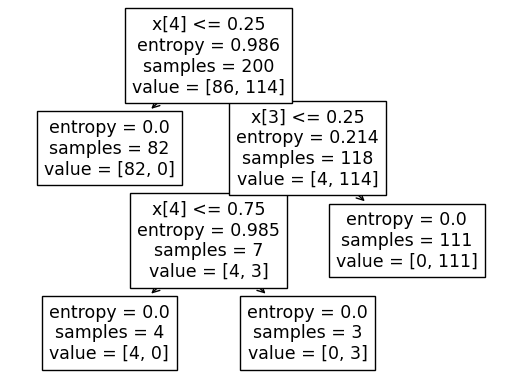

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model1=DecisionTreeClassifier(criterion='entropy',max_depth=3) #entropy:the measure of impurity
model1.fit(xtrain,ytrain)
tree.plot_tree(model1)

[Text(0.4, 0.875, ' competitiveness <= 0.25\nentropy = 0.986\nsamples = 200\nvalue = [86, 114]\nclass = non-bankruptcy'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]\nclass = bankruptcy'),
 Text(0.6, 0.625, ' credibility <= 0.25\nentropy = 0.214\nsamples = 118\nvalue = [4, 114]\nclass = non-bankruptcy'),
 Text(0.4, 0.375, ' competitiveness <= 0.75\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = bankruptcy'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = bankruptcy'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = non-bankruptcy'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 111\nvalue = [0, 111]\nclass = non-bankruptcy')]

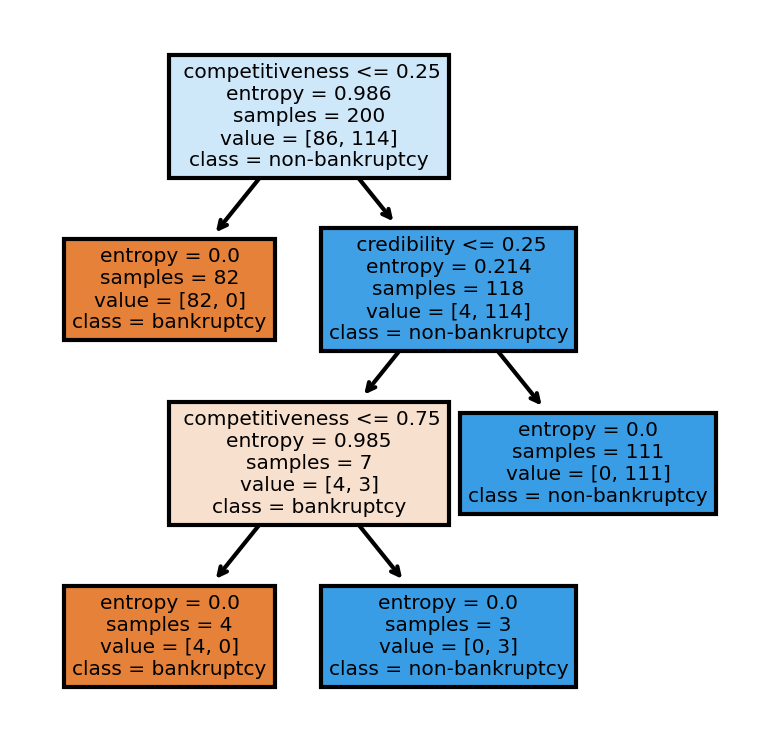

In [ ]:
factor=['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk']
result=['bankruptcy','non-bankruptcy']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model1,
               feature_names=factor,
               class_names=result,
               filled=True)

In [ ]:
dt_preds=model1.predict(xtest)
pd.Series(dt_preds).value_counts()

1    28
0    22
dtype: int64

In [ ]:
dt_preds


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [ ]:
pd.crosstab(ytest,dt_preds)

col_0,0,1
class,,
0,21,0
1,1,28


In [ ]:
np.mean(dt_preds==ytest)#checking accuracy

0.98

In [ ]:
model1.score(xtest,ytest) #automates the prediction

0.98

`decision tress are basically used when data is non-linear and when we need to show how the conclusion is reached.
this classifiers are more prone to overfitting and thus ensemble methods such as bagging,boosting,stacking etc are used`

**THUS , FROM ALL THE ABOVE CLASSIFIERS WE WILL PROCEED WITH SVM MODEL (linear) FOR THE FOLLOWING REASONS :  1)THE PREDICTION ACCURACY IS GOOD . 2) THE CHANCES OF OVERFITTING ARE BARE MINIMUM . 3)ACCURATE DECISION WILL BE MADE ABOUT BANKRUPTCY DATA . 4)IT IS FAST AND EASY TO INTERPRET. 5)WORKS PERFECT WHEN WE HAVE EXACTLY TWO CLASSES TO CLASSIFY BETWEEN.**

In [ ]:
#logistic regression: 100      regularization: i)lasso: 100    ii)ridge: 100

#knn: 98

#naive bayes:  i)gaussian-->100   ii) multinomial-->100     iii) bernoulli-->100

#svm:     i) rbf: 98        ii) linear:100        iii) poly: 57

#decision tree: 98

